In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

In [69]:
data = pd.read_csv('train.csv')

In [70]:
data

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [71]:
data.shape

(42000, 785)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [73]:
data.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
34449      3       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
34449       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
34449         0         0         0         0         0  

[1 rows x 785 columns]

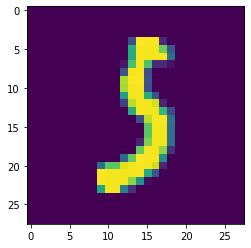

In [74]:
plt.imshow(data.iloc[22645,1:].values.reshape(28,28))

In [75]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [76]:
x.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [77]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [80]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [81]:
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

31.321565628051758


In [82]:
accuracy_score(y_test,y_pred)

0.9648809523809524

In [83]:
# Here we conclude that without decreasing features, i.e using 784 features 
# We have accuracy of 0.96 and time of computation is approx 50 seconds, which is very high. 
# So to decrease the time of computation, we transform features using PCA(Principle Component Analysis).

In [84]:
scaler = StandardScaler()

In [85]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
pca = PCA(n_components=200)

In [87]:
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [88]:
x_train_new.shape                           # 200 features in data

(33600, 200)

In [89]:
# now in new training data, we have 200 features rather than 784 features

In [90]:
knn = KNeighborsClassifier()
knn.fit(x_train_new,y_train)

KNeighborsClassifier()

In [91]:
start = time.time()
y_pred_new = knn.predict(x_test_new)
print(time.time() - start)

12.705158472061157


In [92]:
accuracy_score(y_test,y_pred_new)

0.9508333333333333

In [93]:
# Here we conclude that after decreasing features, i.e using 200 features 
# We have accuracy of 0.95 and time of computation is approx 20 seconds, which is good. 

In [101]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [102]:
x_train_new

array([[-2.71863026, -0.49008974],
       [-0.67700806, -6.75284226],
       [-3.03317865,  6.50913066],
       ...,
       [ 2.14891529,  0.78026445],
       [ 1.0595878 ,  0.94691385],
       [17.70258511,  1.96144701]])

In [103]:
x_train_new.shape                            # 2 features in data

(33600, 2)

In [104]:
y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [105]:
y_train.shape

(33600,)

In [106]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [107]:
import plotly.express as px

y_train_new = y_train.astype(str)
fig = px.scatter(x=x_train_new[:,0], y=x_train_new[:,1],
                 color=y_train_new,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [108]:
# transforming to a 3D coordinate system
pca = PCA(n_components=3)
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [109]:
x_train_new                          # 3 features in data

array([[-2.71862699, -0.48976411,  1.13508947],
       [-0.67698636, -6.75361508, -2.33549967],
       [-3.03322115,  6.50966287,  7.491761  ],
       ...,
       [ 2.14883006,  0.78048093, -0.74709889],
       [ 1.05956595,  0.94777094,  3.94950457],
       [17.7025702 ,  1.9620665 , -4.9432968 ]])

In [110]:
y_train_new = y_train.astype(str)
fig = px.scatter_3d(data, x=x_train_new[:,0], y=x_train_new[:,1], z=x_train_new[:,2],
              color=y_train_new)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [111]:
pca.explained_variance_

# Eigen values for 3D coordinate system

array([40.67111198, 29.17023397, 26.7445961 ])

In [112]:
pca.components_.shape

# Eigen vectors for 3D coordinate system

(3, 784)

In [113]:
pca.explained_variance_ratio_

# explained_variance_ratio_ method of PCA is used to get the ration of variance (eigenvalue / total eigenvalues) 

array([0.05785192, 0.0414927 , 0.03804239])

In [114]:
# Now checking the number of features which we should select, in order to get high accuracy and less computation time.

In [115]:
for i in range(1,784,100):
    pca = PCA(n_components=i)
    x_train_new = pca.fit_transform(x_train)
    x_test_new = pca.transform(x_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(x_train_new,y_train)
    
    y_pred = knn.predict(x_test_new)
    
    print(accuracy_score(y_test,y_pred))

0.25821428571428573
0.9541666666666667
0.9501190476190476
0.9475
0.9435714285714286
0.9413095238095238
0.9397619047619048
0.9391666666666667


In [116]:
pca = PCA(n_components=None)
X_train_new = pca.fit_transform(x_train)
X_test_new = pca.transform(x_test)

In [117]:
pca.explained_variance_.shape

(784,)

In [118]:
pca.components_.shape

(784, 784)

In [119]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

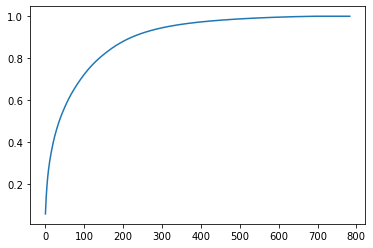

In [120]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [121]:
# So by this graph we conclude that by using approx 200 features, we can explain above 90% variance of original data.
# So it is the number of features, which will give us best accuracy and less time of computation.